In [20]:
import pandas as pd
import numpy as np
import arviz as az

In [21]:
df_brazil = pd.read_excel(r'alldatasets.xlsx',sheet_name='Brazil')

In [22]:
df_brazil.head()

,childid,country,height,stunting_2cat,EDUYRS2,z_score,agegapr1,momeduyrsr1,chsexr1,agemonr1,hhsizer1,wi_newr1,job_cat,pvt_sector,earn_usd
0,BR1,Brazil,180.35,0.0,16.0,0.399053,0.0,5.0,1,50.0,3.0,0.306352,3.0,1,290.316010
1,BR2,Brazil,164.95,0.0,15.0,0.002132,NaN,5.0,0,52.0,3.0,0.533106,3.0,1,109.973544
2,BR8,Brazil,167.10,1.0,5.0,-2.061853,6.0,5.0,1,49.0,12.0,0.115514,3.0,1,109.973544
3,BR12,Brazil,174.75,0.0,13.0,1.351661,2.0,6.0,1,51.0,5.0,0.597647,3.0,1,1060.838040
4,BR14,Brazil,179.35,0.0,11.0,0.557821,NaN,10.0,1,50.0,3.0,0.483788,3.0,1,353.612680


In [23]:
df_brazil.columns

Index(['childid', 'country', 'height', 'stunting_2cat', 'EDUYRS2', 'z_score',
       'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1', 'hhsizer1',
       'wi_newr1', 'job_cat', 'pvt_sector', 'earn_usd'],
      dtype='object')

In [24]:
from scipy import stats
import scipy.stats as stats

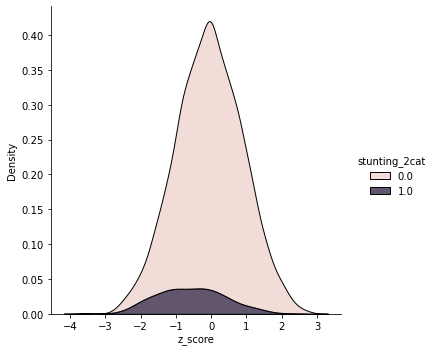

In [25]:
import seaborn as sns
sns.displot(df_brazil, x="z_score", hue="stunting_2cat", kind="kde", multiple="stack")

# Bayesian

In [26]:
Y = df_brazil[['height']]
X = df_brazil[['stunting_2cat']]

In [27]:
formula = 'height ~ ' + ' + '.join(['%s' % variable for variable in X.columns[0:]])
formula

'height ~ stunting_2cat'

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    my_priors= {
        'Intercept': pm.Normal.dist(mu=168.7, sigma=10.),
        'stunting_2cat': pm.Normal.dist(mu=1, sigma=7.8)        
    }
    
    
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df_brazil, priors=my_priors)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=3000, chains = 2, tune = 4000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, stunting_2cat, Intercept]


Sampling 2 chains for 4_000 tune and 3_000 draw iterations (8_000 + 6_000 draws total) took 20 seconds.


In [30]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,169.846,0.200,169.465,170.214,0.002,0.002,6577.0,6577.0,6601.0,4524.0,1.0
stunting_2cat,-8.739,0.628,-9.952,-7.588,0.008,0.006,6522.0,6490.0,6531.0,4671.0,1.0
sd,8.654,0.132,8.403,8.895,0.002,0.001,7643.0,7636.0,7631.0,4600.0,1.0


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stunting_2cat'}>,
        <AxesSubplot:title={'center':'stunting_2cat'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

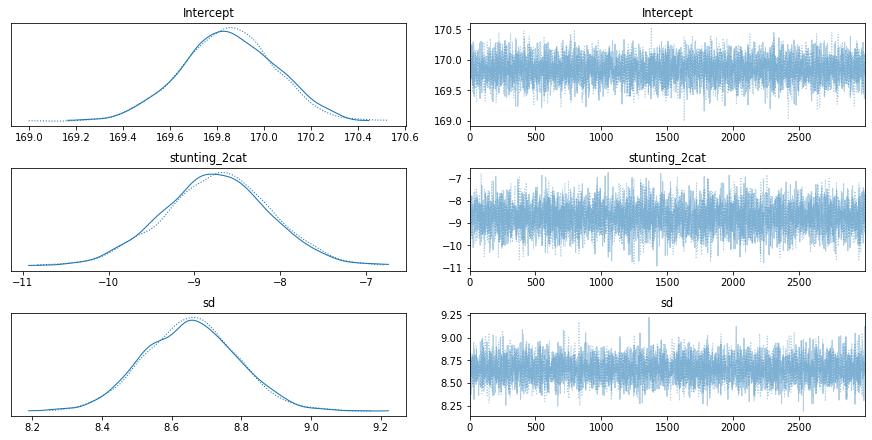

In [31]:
az.plot_trace(normal_trace)

In [32]:
Y = df_brazil['height']
X = df_brazil[['stunting_2cat', 'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1','wi_newr1',
       'hhsizer1']]

In [33]:
formula = 'height ~ ' + ' + '.join(['%s' % variable for variable in X.columns[0:]])
formula

'height ~ stunting_2cat + agegapr1 + momeduyrsr1 + chsexr1 + agemonr1 + wi_newr1 + hhsizer1'

In [34]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    my_priors= {
        'Intercept': pm.Normal.dist(mu=168.7, sigma=10),
        'stunting_2cat': pm.Normal.dist(mu=1, sigma=7.8),
        'agegapr1': pm.Normal.dist(mu=1, sigma=7.8),
        'momeduyrsr1': pm.Normal.dist(mu=1, sigma=7.8),
        'chsexr1': pm.Normal.dist(mu=1, sigma=7.8),
        'agemonr1': pm.Normal.dist(mu=1, sigma=7.8),
        'wi_newr1': pm.Normal.dist(mu=1, sigma=7.8),
        'hhsizer1': pm.Normal.dist(mu=1, sigma=7.8) 
    }
    
    
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df_brazil, priors=my_priors)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=10000, chains = 2, tune = 8000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, hhsizer1, wi_newr1, agemonr1, chsexr1, momeduyrsr1, agegapr1, stunting_2cat, Intercept]


Sampling 2 chains for 8_000 tune and 10_000 draw iterations (16_000 + 20_000 draws total) took 123 seconds.


In [36]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,160.193,1.842,156.719,163.628,0.020,0.014,8724.0,8722.0,8726.0,11083.0,1.0
stunting_2cat,-8.590,0.540,-9.585,-7.567,0.004,0.003,22546.0,22286.0,22569.0,14691.0,1.0
agegapr1,-0.052,0.038,-0.124,0.020,0.000,0.000,23200.0,17632.0,23205.0,15132.0,1.0
momeduyrsr1,0.187,0.046,0.101,0.273,0.000,0.000,15667.0,15618.0,15669.0,14904.0,1.0
chsexr1,12.901,0.308,12.293,13.453,0.002,0.001,21284.0,21284.0,21297.0,14407.0,1.0
agemonr1,0.010,0.040,-0.067,0.083,0.000,0.000,9016.0,9016.0,9013.0,10987.0,1.0
wi_newr1,0.387,0.975,-1.482,2.198,0.008,0.007,13889.0,11077.0,13886.0,14187.0,1.0
hhsizer1,0.142,0.086,-0.024,0.296,0.001,0.000,17530.0,15676.0,17534.0,14217.0,1.0
sd,5.844,0.106,5.644,6.044,0.001,0.001,21463.0,21459.0,21455.0,13337.0,1.0


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stunting_2cat'}>,
        <AxesSubplot:title={'center':'stunting_2cat'}>],
       [<AxesSubplot:title={'center':'agegapr1'}>,
        <AxesSubplot:title={'center':'agegapr1'}>],
       [<AxesSubplot:title={'center':'momeduyrsr1'}>,
        <AxesSubplot:title={'center':'momeduyrsr1'}>],
       [<AxesSubplot:title={'center':'chsexr1'}>,
        <AxesSubplot:title={'center':'chsexr1'}>],
       [<AxesSubplot:title={'center':'agemonr1'}>,
        <AxesSubplot:title={'center':'agemonr1'}>],
       [<AxesSubplot:title={'center':'wi_newr1'}>,
        <AxesSubplot:title={'center':'wi_newr1'}>],
       [<AxesSubplot:title={'center':'hhsizer1'}>,
        <AxesSubplot:title={'center':'hhsizer1'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

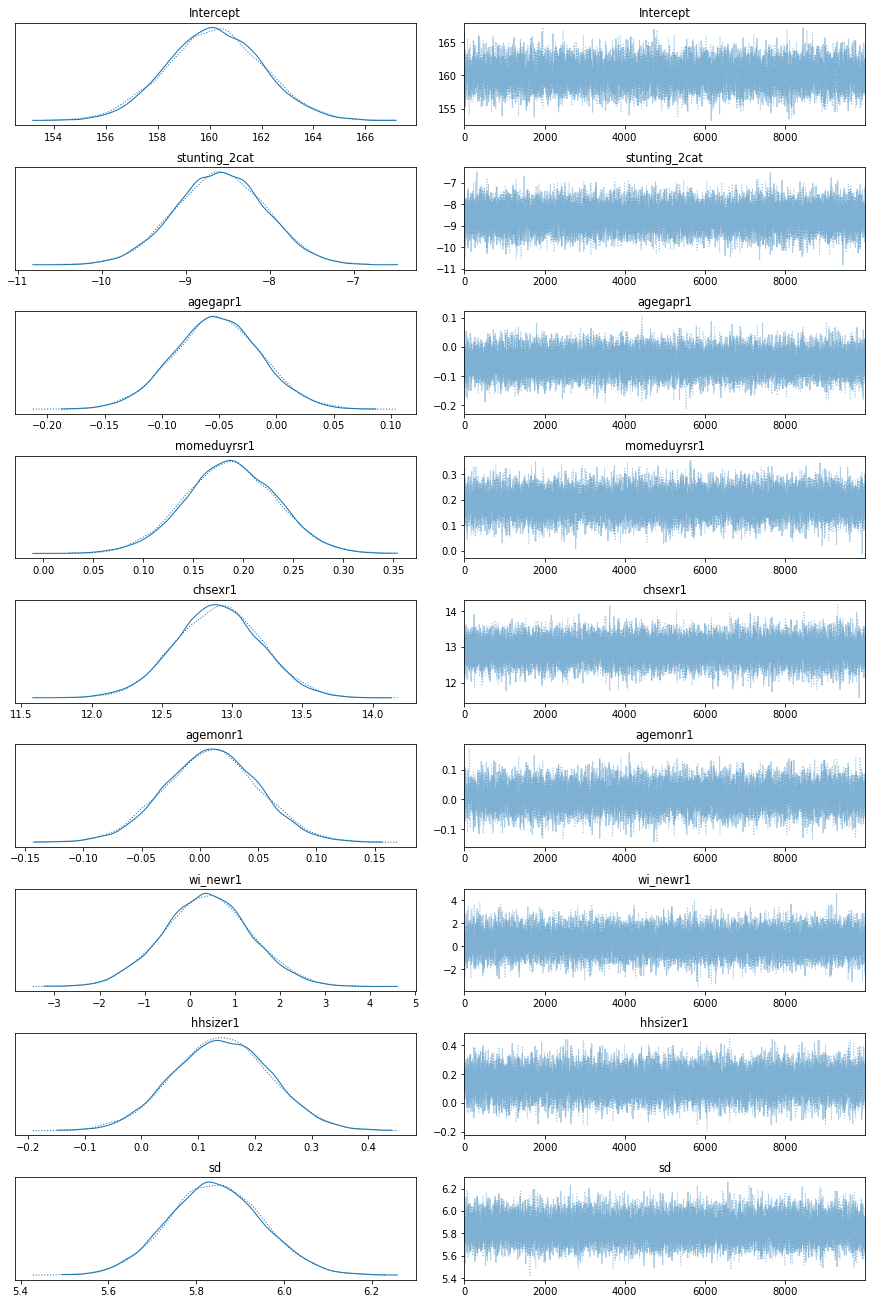

In [37]:
az.plot_trace(normal_trace)

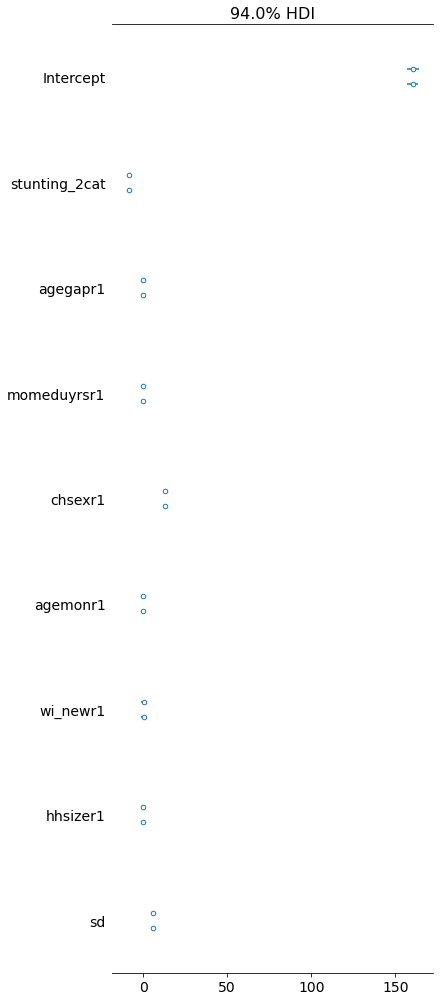

In [38]:
az.plot_forest(normal_trace);